## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [3]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [4]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [6]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [7]:
convert = df.query("converted == 1 ")
convert['user_id'].nunique() / df['user_id'].nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [8]:
x = df.query("landing_page != 'new_page' and group == 'treatment'").shape[0]
y = df.query("landing_page == 'new_page' and group != 'treatment'").shape[0]
x+y

3893

f. Do any of the rows have missing values?

In [9]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [10]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
df_old = df.query("group == 'control' and landing_page == 'old_page'") 
df_new = df.query("group == 'treatment' and landing_page == 'new_page'")
df2 = pd.concat([df_old , df_new])
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2['user_id'].count()

290585

In [14]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
repeat_user_id = df2[df2['user_id'].duplicated() == True]
repeat_user_id

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [16]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
df2.drop(1899 , axis = 0 , inplace=True)

In [18]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
df2[df2['converted'] == 1].shape[0] / df2['converted'].shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
control1 = df2.query("group == 'control' & converted == 1")
control1.shape[0] / df2[df2['group'] == 'control'].shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
treatment1 = df2.query("group == 'treatment' & converted == 1")
treatment1.shape[0] / df2[df2['group'] == 'treatment'].shape[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [22]:
df2[df2['landing_page'] == 'new_page'].shape[0] / df2['converted'].shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

>**As we see above the convert proportion for all unique users is 0.1195.
For the control group is 0.120, while the treatment group is 0.1188
So, these proportions are so close to each other. becouse of that there is no sufficient evidence to say that the treatment group who receives the new page is more converted than the control group who receives the old page.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

>**Null hypothesis** = **$p_{new}$** - **$p_{old}$**  =< 0

>**Alternative hypothesis** = **$p_{new}$** - **$p_{old}$** > 0


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [23]:
new_p = (df2['converted'] == 1).mean()
new_p

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [24]:
old_p = (df2['converted'] == 1).mean()
old_p

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [25]:
new_num = df2.query("group == 'treatment'").shape[0]
new_num

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [26]:
old_num = df2.query("group == 'control'").shape[0]
old_num

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
new_page_converted = np.random.choice([1 , 0] , new_num , p=[new_p , 1-new_p] )
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
old_page_converted = np.random.choice([1,0] , old_num , p=[old_p , 1-old_p] )
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
obs_diff = new_page_converted.mean() - old_page_converted.mean()
obs_diff

-0.00057328416656447778

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [30]:
p_diffs = []
for _ in range (10000):
    new_page_converted = np.random.choice([1 , 0] , new_num , p=[new_p , 1-new_p] )
    old_page_converted = np.random.choice([1, 0 ] , old_num , p=[old_p , 1-old_p] )
    obs_diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(obs_diff)
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [31]:
means_diff = df2.query('group == "treatment"')['converted'].mean() - df2.query('group == "control"')['converted'].mean()
means_diff

-0.0015782389853555567

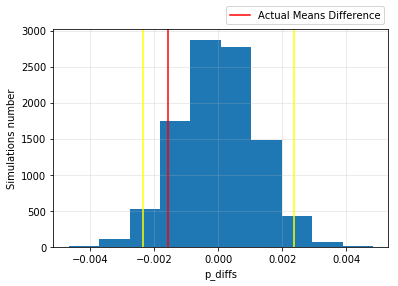

In [32]:
plt.grid(alpha=.3);
plt.hist(p_diffs);
plt.axvline(x=means_diff, color = 'red' , label='Actual Means Difference' );
plt.ylabel('Simulations number');
plt.xlabel('p_diffs') ;
plt.legend(bbox_to_anchor=(0.5,1)) ;
low, upper = np.percentile(p_diffs, 2.5), np.percentile(p_diffs, 97.5)
low, upper
plt.axvline(x=low, color='yellow');
plt.axvline(x=upper, color='yellow');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
p_diffs = np.asarray(p_diffs)

In [34]:
p_value = (p_diffs > means_diff).mean()
p_value

0.90539999999999998

k. Please explain using the vocabulary you've learned in this course what you just computed in part 

**j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>**In this part, we set the null hypothesis to be: the old page is better or at least equal to the new page, while the alternative hypothesis is that the new page is better than the old one.**

>**After that, we found that the conversation rate under the null hypothesis equal to 0.1195
Also, we found the number of users who receive the new page is 145310, while who receive the new page is 145274. These number is very close to each other, that gives us an indicator that our dataset considers as normally distributed.
After that, making the samples for each page then find the sample means. The difference between the conversion rate  of new page and conversion rate of the old page is equal to 0.0007
That's mean the new page converted mean is a bit larger than the old page converted means and the mean of the original dataset is very close to the means of the sample.**

>**In question J, we computed the p-value it is the extreme values in favor of the alternative hypothesis if we consider the null hypothesis is true.
p-value = 0.9033
In this case, the p-value is larger than the alpha(0.05) and have large value. So we can say we fail to reject the null hypothesis.**


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page' & converted == 1").shape[0]
convert_new = df2.query("landing_page == 'new_page' & converted == 1").shape[0]
n_old = (df2[df2['landing_page'] == 'old_page']).shape[0]
n_new = (df2[df2['landing_page'] == 'new_page']).shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [36]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')


In [37]:
z_score

1.3109241984234394

In [38]:
p_value

0.90505831275902449

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

> **The p_value here is almost equal to the p_value in question J, and as the p_value = 0.905 which is greater than the alpha(0.05), we can say we fail to reject the null hypothesis
The z-score here equal to 1.31. It does not exceed the critical value at 95% confidence interval which is 1.96  or be less than -1.96. So again we fail to reject the null hypothesis.
These results give the same finding in question K,  the new page is nor better than the old page.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

> **As in this dataset only have two possible outcomes (converted or not) and it is a categorize, so, logistic regression is what should perform.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [39]:
df3 = df2

In [40]:
df3['intercept'] = 1

In [41]:
df3[['control' , 'treatment']] = pd.get_dummies(df2['group'])

In [42]:
df3.head(0)

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [43]:
lm= sm.Logit(df3['converted'] , df3[['intercept' , 'treatment']])
result1 = lm.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [44]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 24 Jun 2020   Pseudo R-squ.:               8.077e-06
Time:                        09:55:58   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [45]:
np.exp(result1.params)

intercept    0.136863
treatment    0.985123
dtype: float64

In [46]:
1/np.exp(result1.params)

intercept    7.306593
treatment    1.015102
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

> **From the summary above we can see that the p-value for treatment(ab-page) is equal to 0.190, it is less than the p_value in part II (p_value = 0.90), and the coefficient of treatment(ab-page) here is equal to -0.0150.
p-value here is larger than alpha(0.05) which confirms that we fail to reject the null hypothesis.
So, based on the logistic regression, the old page convert rate is equal to the new page convert rate**


> **The reason for this difference because of the different hypotheses in each part. In part II is one side test while here in this part is tow sides test**

> **Null hypothesis:** **$p_{new}$** = **$p_{old}$**  
> **Alternative hypothesis:** **$p_{new}$** !=  **$p_{old}$**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> **I think it's a good idea to add other factors to the regression model. In multiple regression can analyzing the influence of each of these factors in the response variable(converted rate) to give as more information about what is the most influential factors affect the converted rate.
As adding other factors to the regression model, you could be more able to find the characteristics of people who are converting regardless of they use the new page or old page such as their gender, age, or the county they live in.
Also, there are disadvantages for adding factor to the regression model such as it could lead to incorrect findings if it doesn't analyze in the right way. Besides that, these factors should not be relative to each other, because if it relative to each other will lead us to false findings.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [47]:
countries = pd.read_csv('countries.csv')
countries.head(0)

,user_id,country


In [48]:
df3 = df3.join(countries.set_index('user_id'), on='user_id' , how='inner')

In [49]:
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,1,0,US
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,1,0,US


In [50]:
df3[['CA' , 'UK' , 'US']]=pd.get_dummies(df3['country'])
df2.head(0)

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment


In [51]:
lm2 = sm.Logit(df3['converted'] , df3[['intercept' ,'UK' , 'US']])
result2 = lm2.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 24 Jun 2020   Pseudo R-squ.:               1.521e-05
Time:                        09:55:59   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

In [52]:
np.exp(result2.params)

intercept    0.130350
UK           1.052027
US           1.041647
dtype: float64

In [53]:
1/np.exp(result2.params)

intercept    7.671651
UK           0.950546
US           0.960018
dtype: float64

> **From the summary above we can see that the p-values are greater than alpha(0.05), which means it does not statically affect the conversion rate.**


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [61]:
df3['us_page'] = df3['US'] * df3['treatment']
df3['uk_page'] = df3['UK'] * df3['treatment']
df3['ca_page'] = df3['CA'] * df3['treatment']


In [63]:
logit= sm.Logit(df3['converted'] , df3[['intercept' ,'uk_page' ,'ca_page' ]])
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 24 Jun 2020   Pseudo R-squ.:               2.364e-05
Time:                        09:59:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.08085
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9963      0.006   -322.049      0.000      -2.008      -1.984
uk_page        0.0149      0.017      0.862      0.389      -0.019       0.049
ca_page       -0.0752      0.038     -1.997      0.046      -0.149      -0.001
==============================================================================
"""

In [64]:
logit= sm.Logit(df3['converted'] , df3[['intercept' ,'treatment' ,'UK' , 'US']])
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 24 Jun 2020   Pseudo R-squ.:               2.323e-05
Time:                        09:59:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
treatment     -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [54]:
np.exp(results.params)

intercept    0.131332
treatment    0.985168
UK           1.051944
US           1.041599
dtype: float64

In [55]:
1/np.exp(results.params)

intercept    7.614303
treatment    1.015056
UK           0.950621
US           0.960062
dtype: float64

> **From this summary it contains all the factors that could affect the response variable (converted rate)
It seems all the p_values are greater than alpha(0.05), which mean all these factors are not statically affecting the converted rate**

# conclusions

> In this project, we focused on the different parts to study the converted rate that users do and whether the company should implement the new page, keep the old page. Also, what are the factors that affect this rate?

>**Part I - Probability**
This dataset is normally distributed as 50% of the users received the new page(treatment group)
The converted probability regardless of the page type = 0.11
The converted probability of the control group = 0.12
The converted probability of the treatment group = 0.11
So, there is no evidence to say the new page is better than the old page.

>**Part II - A/B Test**
We assumed the null hypothesis is an old page equal or better than the new page, while the alternative hypothesis is the new page is better.
We find the difference between the mean of the new page - the mean of the old page = -0.0015
The p_value = 0.90 which greater than alpha(0.05) and the z-value =1.31 is less than the crtical value 1.96 at 95% convidance intreval.
So, we fail to reject the null hypothesis.

>**Part III - A regression approach**
In this part, we used the logistic regression model, to study the relation between the factors and the converted rate.
After running different logistic regression model between the converted with a landing page or countries or both, we find that the p_values of each of these factors are greater than alpha(0.05), which mean all these factors are not statically effecting on the converted rate.
So, the regression finding agrees with  A/B test results.

>Finally, we can say that the new page has no effect to increase the converted rate as the company wants, the company could remodel the new page and retest the result.


<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [62]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0